In [107]:
import os

import numpy as np
import pandas as pd 

import librosa
import librosa.display

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.decomposition import PCA

In [3]:
# config
category_name = ["ball", "inner_race", "out_race", "normal"]
rpm = "1796"
path = "..\\..\\Bearing Vibration Image\\data_set_48k_csv\\"

batch_size = 128
epochs = 20
num_of_mfccs = 13
num_classes = 4
sample_rate = 48000

In [217]:
def load_mfccs_CWRU(datasets = [0],n_mfcc = num_of_mfccs):
    mfccs = np.empty((0,n_mfcc + 1))
    for index in datasets:
        for index_name, name in enumerate(category_name):
            file_name  = path+ str(index) + "hp_" + name + "_" + rpm + ".csv"
            print(f"Reading from {file_name}")
            data_frame = pd.read_csv(file_name)
            for no_bearing in range(0,len(data_frame.columns)):
                arr    = data_frame.iloc[:,no_bearing].values
                arr    = librosa.feature.mfcc(y = arr , sr = sample_rate, n_mfcc = n_mfcc).T
                category_column = np.zeros((arr.shape[0], 1), dtype = int) + index_name
                arr    = np.hstack((arr,category_column))
                mfccs  = np.vstack((mfccs, arr))
    return mfccs

In [218]:
def scale_train_test_split(mfccs,return_train_test = True):
    data = mfccs[:,:-1]
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    data_labels = mfccs[:,-1]
    if(return_train_test):       
        x_train, x_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.3)
        return x_train, x_test, y_train, y_test
    else:
        return data,data_labels

In [219]:
def mlp_sklearn(x, y):
    classifier = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=300, activation = 'relu',solver ='adam',random_state=1)
    classifier.fit(x, y)
    return classifier

In [220]:
def mlp_keras(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=(num_of_mfccs,)))
    model.add(Dropout(0.2))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss      = 'categorical_crossentropy',
                  optimizer = RMSprop(),
                  metrics   = ['accuracy'])

    history = model.fit(x_train, to_categorical(y_train),
                        batch_size      = batch_size,  #https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network
                        epochs          = epochs,
                        verbose         = 1,
                        validation_data = (x_test, to_categorical(y_test)))
    
    return model

In [221]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
def PCA_sklearn(x,number_components = 2):
    pca = PCA(n_components = number_components)
    principalComponents = pca.fit_transform(x)
    return principalComponents

In [222]:
def plot_two_dimension_data(x,y):
    return None

In [223]:
def print_confusion_matrix(predictions, y_true):
    print(confusion_matrix(y_true, predictions))

In [224]:
def print_performance_metrics(predictions, y_true):
    print(classification_report(y_true, predictions))

# MLP (Sklearn)

#### Preprocess

In [225]:
mfccs = load_mfccs_CWRU([0,1,2,3], num_of_mfccs)
print(mfccs.shape)

Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\0hp_ball_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\0hp_inner_race_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\0hp_out_race_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\0hp_normal_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\1hp_ball_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\1hp_inner_race_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\1hp_out_race_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\1hp_normal_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\2hp_ball_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\2hp_inner_race_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\2hp_out_race_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\2hp_normal_1796.csv
Reading from ..\..\Bearing V

In [226]:
# Further TO DO: Mean of Mfccs, images (FOR CNN)'
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(mfccs)
# plt.colorbar()
# plt.title('MFCC')
# plt.tight_layout()
# plt.show()

#### Shuffle + Train test split

In [227]:
x_train, x_test, y_train, y_test = scale_train_test_split(mfccs)

In [228]:
y_train

array([0., 1., 0., ..., 0., 0., 2.])

### Data vizualization using PCA

In [229]:
principal_components = PCA_sklearn(x_train)
print(principal_components)

[[ 0.44996419 -0.54697359]
 [-0.01678765  0.68752008]
 [ 0.51673551 -0.3683088 ]
 ...
 [-0.31452367 -0.03320698]
 [-0.53388115 -0.15669263]
 [-0.32290317  0.15005948]]


In [230]:
y_train

array([0., 1., 0., ..., 0., 0., 2.])

(4662, 2)
(4672, 2)
(4680, 2)
(4625, 2)


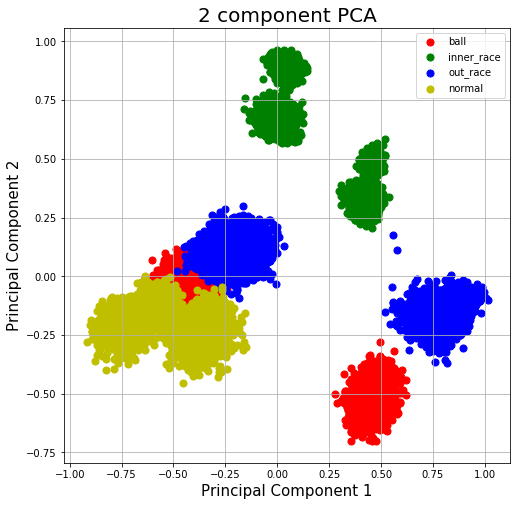

In [241]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = {0: "ball", 1 : "inner_race" , 2 : "out_race", 3 : "normal"}
colors = ['r', 'g', 'b', 'y']

for target, color in zip(targets,colors):
    indicesToKeep = y_train == target
    principal_component_class = principal_components[indicesToKeep]
    print(principal_component_class.shape)
    ax.scatter( principal_component_class[:, 0], 
                principal_component_class[:, 1], 
                c = color,
                s = 50)
ax.legend(targets.values())
ax.grid()

#### Instantiate MLP from sklearn

In [69]:
classifier = mlp_sklearn(x_train,y_train)

In [70]:
predictions = classifier.predict(x_test)

In [71]:
print_confusion_matrix(predictions, y_test)

[[284   0   0   0]
 [  0 264   0   0]
 [  0   0 296   0]
 [  0   0   0 302]]


In [72]:
print_performance_metrics(predictions, y_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       284
         1.0       1.00      1.00      1.00       264
         2.0       1.00      1.00      1.00       296
         3.0       1.00      1.00      1.00       302

    accuracy                           1.00      1146
   macro avg       1.00      1.00      1.00      1146
weighted avg       1.00      1.00      1.00      1146



## Test MLP on other load (different hp)

In [73]:
mfccs_other_load = load_mfccs_CWRU([1,2,3], num_of_mfccs)

Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\1hp_ball_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\1hp_inner_race_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\1hp_out_race_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\1hp_normal_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\2hp_ball_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\2hp_inner_race_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\2hp_out_race_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\2hp_normal_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\3hp_ball_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\3hp_inner_race_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\3hp_out_race_1796.csv
Reading from ..\..\Bearing Vibration Image\data_set_48k_csv\3hp_normal_1796.csv


In [74]:
data_test ,data_test_labels = scale_train_test_split(mfccs_other_load, False)

In [75]:
data_test_labels.shape

(22810,)

In [76]:
predictions_other_load =  classifier.predict(data_test)

print(np.sum((predictions_other_load == data_test_labels)) /predictions_other_load.shape * 100)

[99.76326173]


In [77]:
print_confusion_matrix(predictions_other_load, data_test_labels)

[[5670    0    3   43]
 [   0 5696    0    0]
 [   0    0 5712    0]
 [   8    0    0 5678]]


In [78]:
print_performance_metrics(predictions_other_load, data_test_labels)

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      5716
         1.0       1.00      1.00      1.00      5696
         2.0       1.00      1.00      1.00      5712
         3.0       0.99      1.00      1.00      5686

    accuracy                           1.00     22810
   macro avg       1.00      1.00      1.00     22810
weighted avg       1.00      1.00      1.00     22810



# Keras - MLP

In [79]:
mlp_keras_model = mlp_keras(x_train, y_train, x_test, y_test)

Train on 2672 samples, validate on 1146 samples
Epoch 1/20
2672/2672 [==============================] - 0s 54us/step - loss: 1.4120 - accuracy: 0.2915 - val_loss: 1.3237 - val_accuracy: 0.3970
Epoch 2/20
2672/2672 [==============================] - 0s 12us/step - loss: 1.3233 - accuracy: 0.3593 - val_loss: 1.2399 - val_accuracy: 0.4031
Epoch 3/20
2672/2672 [==============================] - 0s 12us/step - loss: 1.2317 - accuracy: 0.4644 - val_loss: 1.1302 - val_accuracy: 0.6789
Epoch 4/20
2672/2672 [==============================] - 0s 12us/step - loss: 1.1210 - accuracy: 0.6059 - val_loss: 1.0084 - val_accuracy: 0.7487
Epoch 5/20
2672/2672 [==============================] - 0s 12us/step - loss: 1.0260 - accuracy: 0.6613 - val_loss: 0.8973 - val_accuracy: 0.8569
Epoch 6/20
2672/2672 [==============================] - 0s 12us/step - loss: 0.9274 - accuracy: 0.7260 - val_loss: 0.7807 - val_accuracy: 0.9101
Epoch 7/20
2672/2672 [==============================] - 0s 12us/step - loss: 0.826

In [80]:
mlp_keras_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                280       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 84        
Total params: 784
Trainable params: 784
Non-trainable params: 0
_________________________________________________________________


In [81]:
score = mlp_keras_model.evaluate(data_test, to_categorical(data_test_labels), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08836587232646582
Test accuracy: 0.9968435168266296


In [82]:
predictions_keras_mlp = mlp_keras_model.predict_classes(data_test)

In [83]:
predictions_keras_mlp

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [84]:
print_confusion_matrix(predictions_keras_mlp, data_test_labels)

[[5649    0    0   67]
 [   0 5696    0    0]
 [   0    0 5712    0]
 [   5    0    0 5681]]


# Data from other set (NASA) -> Faulty

In [87]:
data_dir = "D:\\Facultate\\data sets\\2nd_test"
for filename in os.listdir(data_dir):
    print(filename)
    df = pd.read_csv(data_dir + "\\" + filename, sep='\t',header = None)
    nasa_data = df.iloc[: ,0].values
    nasa_data_mfccs = librosa.feature.mfcc(y = nasa_data , n_mfcc = num_of_mfccs).T
    predictions_nasa = mlp_keras_model.predict_classes(nasa_data_mfccs)
    print(list_nasa[index])
    unique, counts = np.unique(predictions_nasa, return_counts=True)
    current_dict = dict(zip(unique, counts))
    print( current_dict, (current_dict[max(current_dict, key=current_dict.get)]/  nasa_data_mfccs.shape[0]) * 100 , "%")

2004.02.12.10.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.10.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.10.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.11.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.11.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.11.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.11.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.11.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.11.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.12.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.12.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.12.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.12.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.12.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.12.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.13.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.13.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.12.13.22.39
2004.02.19.04.32.39
{3: 41} 

2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.11.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.11.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.11.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.11.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.11.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.12.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.12.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.12.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.12.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.12.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.12.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.13.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.13.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.13.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.13.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.13.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.13.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.13.1

2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.11.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.11.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.12.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.12.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.12.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.12.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.12.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.12.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.13.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.13.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.13.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.13.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.13.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.13.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.14.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.14.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.14.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.14.1

2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.12.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.12.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.12.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.12.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.13.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.13.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.13.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.13.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.13.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.13.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.14.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.14.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.14.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.14.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.14.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.14.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.15.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.15.1

2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.12.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.13.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.13.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.13.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.13.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.13.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.13.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.14.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.14.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.14.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.14.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.14.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.14.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.15.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.15.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.15.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.15.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.16.1

2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.13.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.13.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.13.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.13.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.14.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.14.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.14.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.14.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.14.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.14.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.15.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.15.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.15.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.15.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.15.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.15.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.16.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.17.1

2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.13.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.13.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.13.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.14.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.14.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.14.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.14.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.14.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.14.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.15.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.15.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.15.22.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.15.32.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.15.42.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.15.52.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.16.02.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.16.12.39
2004.02.19.04.32.39
{3: 41} 100.0 %
2004.02.18.1

In [85]:
faulty_nasa_dataset   = "2004.02.19.04.32.39"
healthy_nasa_dataset1 = "2004.02.13.08.52.39"
healthy_nasa_dataset2 = "2003.10.22.18.24.13"
list_nasa = [faulty_nasa_dataset,healthy_nasa_dataset1,healthy_nasa_dataset2]

In [88]:
for index in range(0, len(list_nasa)):
    df = pd.read_csv(list_nasa[index], sep='\t',header = None)
    nasa_data = df.iloc[: ,0].values
    nasa_data_mfccs = librosa.feature.mfcc(y = nasa_data , n_mfcc = num_of_mfccs).T
    predictions_nasa = mlp_keras_model.predict_classes(nasa_data_mfccs)
    print(list_nasa[index])
    unique, counts = np.unique(predictions_nasa, return_counts=True)
    current_dict = dict(zip(unique, counts))
    print( current_dict, (current_dict[max(current_dict, key=current_dict.get)]/  nasa_data_mfccs.shape[0]) * 100 , "%")

2004.02.19.04.32.39
{1: 41} 100.0 %
2004.02.13.08.52.39
{3: 41} 100.0 %
2003.10.22.18.24.13
{3: 41} 100.0 %


In [211]:
df = pd.read_csv(healthy_nasa_dataset1, sep='\t',header = None)

In [212]:
nasa_data = df.iloc[: ,0].values

In [213]:
nasa_data_mfccs = librosa.feature.mfcc(y = nasa_data , n_mfcc = num_of_mfccs).T

In [214]:
nasa_data_mfccs.shape

(41, 13)

In [89]:
predictions_nasa = mlp_keras_model.predict_classes(nasa_data_mfccs)

In [216]:
unique, counts = np.unique(predictions_nasa, return_counts=True)
dictionary = dict(zip(unique, counts))

In [217]:
dictionary

{3: 41}

In [218]:
(dictionary[max(dictionary, key=dictionary.get)] / nasa_data_mfccs.shape[0]) * 100

100.0

# CNN

#### Process data

# Gaussian

# KNN

In [64]:
k_range = range(1,26)
scores_list = []

### Train on 0 hp and test on 1,2,3 hp load

In [90]:
for k in k_range : 
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(data_test)
    scores_list.append(metrics.accuracy_score(data_test_labels,y_pred) * 100)

In [91]:
scores_list

[99.24594476106971,
 98.97851819377466,
 99.75449364313897,
 99.68434896975012,
 99.75010960105217,
 99.70188513809732,
 99.77202981148619,
 99.73695747479175,
 99.74134151687856,
 99.71503726435775,
 99.73695747479175,
 99.71065322227093,
 99.74134151687856,
 99.71065322227093,
 99.71942130644454,
 99.70626918018412,
 99.73695747479175,
 99.72380534853134,
 99.73695747479175,
 99.69750109601053,
 99.72818939061816,
 99.69311705392371,
 99.71503726435775,
 99.68434896975012,
 99.71065322227093]

### Trained on 0 hp, tested on NASA data set bearings - not very bright

In [92]:
df = pd.read_csv(healthy_nasa_dataset1, sep='\t',header = None)

In [93]:
nasa_data = df.iloc[: ,0].values
nasa_data_mfccs = librosa.feature.mfcc(y = nasa_data , n_mfcc = num_of_mfccs).T
predictions_nasa = knn_model.predict(nasa_data_mfccs)

In [94]:
unique, counts = np.unique(predictions_nasa, return_counts=True)
dict(zip(unique, counts))

{0.0: 25, 3.0: 16}

# Autoencoder network

# HMM (Hidden Markov Models)